In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_2_system_analysis.ipynb")

# HW 2: Analysis of a mass-damped system

Resources: Lecture slides describing the homework: https://docs.google.com/presentation/d/1MwF34w30rjzLS5-IYj0ZWT5CjsLeFc7qlG_Eq9rFdZ8/edit?usp=sharing All of the equations for this homework are in those slides.

- Part 1/week 4 does not build on anything specific in lab 4, but uses functions and numpy
- Part 2/week 5: Do lab 5 before homework 

In the first part of this homework the focus is on doing an analysis "from scratch", in the sense that we will not be
providing a lot of shell code. The second half is on how to translate a general equation of the form

  *derivative of state at time t = f( state at time t )*
  
into code (also known as simulation).

Programming practice: The focus in this assignment is on deciding when to create a function and what parameters to pass in and out of the function.

Following on from lab 5, the second part of the assignment will be an example of writing an iterative function - one where the intention is to call the function multiple times, each time passing in the values returned from the previous function call. This can be a bit difficult to wrap your head around, so if you get stuck go back to the simpler examples and/or do it on paper yourself a few iterations.

We've provided results (as a json file) for three of the included data sets. We will, however, be testing on different data sets, so make sure your code works for any data file of the correct format.

TODOS: For each helper function
- Write the function
- Check that it works

You have some flexibility as to how the write the helper functions, but you must use the names/input/output format given or the autograder won't work...

Helper function is not a technical term - it's just what I call a function that does some part of the functionality of the entire task.

## Helper function 1 - load the data and check that it's valid
 - Input: File name (with path)
 - Output: Two numpy arrays
   -- 1st numpy array: The time values
   -- 2nd numpy array: The function values that correspond to the time values
   
You MUST use this format and the file name given, or the autograder will fail.

The two arrays should be of the same length

Some expectations on the data files
 - Always has at least three rows
 --First row is a header row
- The first column is the time values (will be monotonically increasing)
- The second column is the values that correspond to the time values (final value of this will be greater than initial)

A good habit is to check that these are true, and throw an error if it's not

Note: Use numpy's **loadtxt** to load the data. **loadtxt** has an option to skip rows, so that you can skip the headers at the front of the row. 

In [2]:
# TODO: Put your imports here
import numpy as np
import json as json
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import argrelmin, argrelmax

In [3]:
# TODO: Put your function definition for loading the data here
# Note: use the variable viewer to check that the ts and vs are correct/the same as in the .csv file
#  Reminder: usie numpy's loadtxt - you just have to tell it to skip the first row

# You must name your function load_data_from_file with the first parameter being the filename
#  The function should return ts, vs
def load_data_from_file(fname):
    data = np.loadtxt(fname, delimiter=',', skiprows = 1)
    t_values = data[:, 0]
    y_values = data[:, 1]
    return t_values, y_values


In [4]:
# TODO: Call your function here

# Make sure that you assign the t and y values to the variable names ts_data1, vs_data1
# Read data in from data1.csv
ts_data1, vs_data1 = load_data_from_file('Data/data1.csv')

In [5]:
grader.check("load_data")

load_data results: All test cases passed!

## Helper function 2 - get the index of the local minima or local maxima

Look at the equations in the slides - why is this a useful helper function?

- Input (2): A numpy array, boolean (True: find local maxima, False: find local minima)
- Output: The index of every local maxima or local minima in the input array

Use the **argrelmin** and **argrelmax** functions to find the indices of the minimum and maximum values in a numpy array.
These functions are in scipy.signal module. They essentially bundle the find max, and where code we've been writing
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelmin.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelmax.html

In [6]:


# TODO: Add importing argrelmax and argrelmin to your imports. They are in scipy.signal
 
# TODO: Write b_peak_or_valley function.
# This function takes in data and whether or not to search for the peak or the valley. It returns an index or None if no peak/valley
# If b_peak_or_valley is True, return the peak
def find_peak_or_valley(data, b_peak_or_valley):
    if b_peak_or_valley:
        max = argrelmax(data, axis=0, order=1, mode='clip')
        return max[0]
    else:
        min = argrelmin(data, axis=0, order=1, mode='clip')
        return min[0]
    pass



In [7]:
# Test your function with datas.
data_a = np.array([1.0, 3.0, 4.0, 7.0, 6.0, 8.0, 9.0, 10.0, 5.0])
data_b = np.array([-2.5, 1.0, 4.0, 8.0, 4.0, 1.0, -2.5])
data_c = np.array([1.1, 2.2, 3.3, 4.4])

# TODO Add tests - what should the correct values be? If you are unsure, try plotting the data
assert all(find_peak_or_valley(data_a, b_peak_or_valley=True) == [3, 7])
assert all(find_peak_or_valley(data_a, b_peak_or_valley=False) == [4])
assert all(find_peak_or_valley(data_b, b_peak_or_valley=True) == [3])
assert all(find_peak_or_valley(data_b, b_peak_or_valley=False) == [])
assert all(find_peak_or_valley(data_c, b_peak_or_valley=True) == [])
assert all(find_peak_or_valley(data_c, b_peak_or_valley=False) == [])

In [8]:
grader.check("get_index")

get_index results: All test cases passed!

## Analysis code

TODO: Write a function that takes in a file name and outputs a dictionary with the values listed below
 - You must use the names given (see json file/example in homework slide)
 - See homework slides for further definitions/equations

Check the corresponding json file and plot for the correct values 

### System values (Slide 8)
 - c_initial - the initial position of the system (the first value)
 - c_peak - the largest position of the system (or the first peak position, see Figure 4.14)
 - c_final - the final, steady-state position of the system (the last value, see Figure 4.14)

Note: For this assignment we'll just use the last value, but you could also average the last few values

###  Estimate peak and valley times and values
 - c_second_peak - the second peak position of the system (local maximum value)
 - c_valley - the first valley position of the system (local minimum value)
 - t_peak - the peak time of the system
 - t_second_peak - the second peak time of the system
 - t_valley - the first valley time of the system
 - peak_period - the period between two peaks, (t_second_peak - t_peak) or (t_valley - t_peak)*2
 - perc_overshoot - percentage over shoot (% OS). This is the amount that the system overshoots c_final, expressed as a percentage of the range c_initial to c_final.

###    Estimate model values
 - system_mass - assume the mass is 1 (this will not be true in part II)
 - system_spring - this is omega_n^2 * system_mass (see slides)
 - system_damping - the damping coeifficient (the linear coefficient, see slides)

You may write some additional helper functions here, if you wish. Actually, I recommend writing this in pieces/multiple functions. One breakdown is the one given above - calculate the values in turn.

I'd suggest writing a test function for each of the group of equations above, where you test against the answers in the data1.json file (with the data1.csv file as input). 

I have written a general-purpose test function for you, but it tests everything all at once.

In [9]:
# Cell for the first function (you write)
def system_val(ts_data, vs_data, system_mass):
    c_initial = vs_data[0]
    peak_list = find_peak_or_valley(vs_data, b_peak_or_valley=True)
    c_peak = vs_data[peak_list[0]]
    c_final = vs_data[-1]
    system_values = {'c_initial':c_initial,
                      'c_peak':c_peak,
                        'c_final':c_final
                        }
    return system_values

In [10]:
# Test cell for that function


In [11]:
#  Another cell for a second function
def find_peaks_valleys(ts_data, vs_data, system_mass):
    peak_list = find_peak_or_valley(vs_data, b_peak_or_valley=True)
    c_second_peak = vs_data[peak_list[1]]
    valley_list = find_peak_or_valley(vs_data, b_peak_or_valley=False)
    c_valley = vs_data[valley_list[0]]
    t_peak = ts_data[np.where(vs_data == vs_data[peak_list[0]])].item()
    t_second_peak = ts_data[np.where(vs_data == c_second_peak)].item()
    t_valley = ts_data[np.where(vs_data == c_valley)].item()
    peak_period = (t_second_peak - t_peak)
    perc_overshoot = (vs_data[-1] - c_valley)/(vs_data[peak_list[0]] - vs_data[-1])*100
    peaks_and_valleys = {
        'c_second_peak':c_second_peak,
        'c_valley':c_valley, 
        't_peak':t_peak,
        't_second_peak':t_second_peak,
        't_valley':t_valley, 
        'peak_period':peak_period,
        'perc_overshoot':perc_overshoot
                          }
    
    M = perc_overshoot/100
    zeta = -np.log(M) / np.sqrt(np.pi**2 + np.log(M)**2)
    omega_n = (2 * np.pi) / (peak_period * np.sqrt(1 - zeta**2))
    system_spring = system_mass*(omega_n)**2
    system_damping = 2*system_mass*zeta*omega_n
    model_values = {
        'system_mass':system_mass,
        'system_spring':system_spring,
        'system_damping':system_damping
    }
    return peaks_and_valleys, model_values

In [12]:
# Another cell for testing the above function...


In [13]:
# Another cell for another function...


In [14]:


# TODO: Based on the given ts and vs, create a dictionary with all of the parameters. Return the dictionary.
# If mass is not given, assume it is 1
def analyze_data_from_values(ts, vs, mass=1.0):
    system_values = system_val(ts, vs, mass)
    peaks_and_valleys, model_values = find_peaks_valleys(ts, vs, mass)
    system_values.update(peaks_and_valleys)
    system_values.update(model_values)
    return system_values
    pass    


In [15]:


# TODO: Open the filename and call the analyze_data_from_values function. Return the dictionary.
# If mass is not given, assume it is 1
def analyze_data(fname, mass=1.0):
    ts, vs = load_data_from_file(fname)
    system_values = system_val(ts, vs, mass)
    peaks_and_valleys, model_values = find_peaks_valleys(ts, vs, mass)
    system_values.update(peaks_and_valleys)
    system_values.update(model_values)
    return system_values
    pass


In [16]:
# TEST CELL

# Call the analyze_data function(s) with one of the data files 
print(analyze_data(fname='Data/data1.csv', mass=1.0))


{'c_initial': -1.0, 'c_peak': 0.854459357957, 'c_final': -8.96706075522e-06, 'c_second_peak': 0.623856525102, 'c_valley': -0.730114989685, 't_peak': 0.315, 't_second_peak': 0.944, 't_valley': 0.629, 'peak_period': 0.629, 'perc_overshoot': 85.44565096770248, 'system_mass': 1.0, 'system_spring': 100.03356014604226, 'system_damping': 1.000252294817643}


In [17]:
def compare_dictionaries(fname_dictionary, check_dict):
    """ Open up the json file in fname and compare to check_dict
    @param fname_dictionary one of dataX.json
    @param check_dict - your dictionary with parameters
    @returns True or False if the same (within epsilon)"""
    from json import load
    with open(fname_dictionary, 'r') as fp:
        answ_dict = load(fp)

    b_ret = True
    for k, v in answ_dict.items():
        try:
            if not np.isclose(v, check_dict[k], rtol=0.1):
                print(f"Key {k} is not close, correct value {v}, incorrect {check_dict[k]}")
                b_ret = False
        except KeyError:
            print(f"Key {k} not found in your dictionary")
            b_ret = False
    return b_ret


In [18]:
grader.check("analysis")

analysis results: All test cases passed!

<!-- BEGIN QUESTION -->

## Plot the data and the system parameters

TODO Plot the data with the parameters, similar to the figures in the slides

You should have **the first and second peaks**, **the first valley**, and **peak period** plotted on the figure

Optional: Plot all of the data on the left hand side, then plot a "clipped" version of the data (clip to where it stops vibrating) with the parameters on them.

Create one plot each for each data file.

- matplotlib has a text function for placing text

When deciding what functions to write: I've left four blocks here. The first block should be function(s) that do the plotting/reading/analysis, etc. Blocks 2-4 should just call those functions with the different data files.

In [19]:
# An example of creating a "helper" function that does a plotting task 
def draw_corner(axs, x_values, y_values, ls, col):
    axs.plot([x_values[0], x_values[1]], [y_values[1], y_values[1]], linestyle=ls, color=col)
    axs.plot([x_values[1], x_values[1]], [y_values[0], y_values[1]], linestyle=ls, color=col)


In [20]:
# Cell for writing additional plot functions
def ts_vs_fname(fname, m=1.0):
    dict = analyze_data(fname, mass=1.0)
    ts, vs = load_data_from_file(fname)
    name = os.path.splitext(os.path.basename(fname))[0]
    return dict, ts, vs, name    

In [21]:
    
# TODO: 
#  Write a function, plot_system, that reads in the data, analyzes it, then plots it
def plot_system(axs, dict, ts, vs, name, m=1.0):

    axs[0].set_title(f'{name}, mass {m}')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Value c(t)')
    axs[0].plot(ts, vs, color='orange')

    axs[1].set_title(f'{name}, mass {m}')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Value c(t)')
    axs[1].plot(ts, vs, color='orange')

    draw_corner(axs[1], [0, dict['t_peak']], [dict['c_peak'], dict['c_peak']], ls='--', col='red')
    draw_corner(axs[1], [dict['t_peak'], dict['t_peak']], [dict['c_peak'], -1], ls='--', col='red')
    axs[1].text(dict['t_peak'], dict['c_peak'], 'First peak', color='red')
    axs[1].text(dict['t_peak'], -1, f'{dict['t_peak']}', color='red')

    draw_corner(axs[1], [0, dict['t_second_peak']], [dict['c_second_peak'], dict['c_second_peak']], ls='--', col='green')
    draw_corner(axs[1], [dict['t_second_peak'], dict['t_second_peak']], [dict['c_second_peak'], -1], ls='--', col='green')
    axs[1].text(dict['t_second_peak'], dict['c_second_peak'], 'Second peak', color='green')
    axs[1].text(dict['t_second_peak'], -1, f'{dict['t_second_peak']}', color='green')

    draw_corner(axs[1], [dict['t_peak'], dict['t_second_peak']], [0, 0], ls='--', col='black')
    axs[1].text(dict['t_second_peak'], 0, 'Peak period peak', color='black')

    draw_corner(axs[1], [0, dict['t_valley']], [dict['c_valley'], dict['c_valley']], ls='--', col='blue')
    draw_corner(axs[1], [dict['t_valley'], dict['t_valley']], [dict['c_valley'], -1], ls='--', col='blue')
    axs[1].text(dict['t_valley'], dict['c_valley'], 'First peak', color='blue')
    axs[1].text(dict['t_valley'], -0.85, f'{dict['t_valley']}', color='blue')



    
    

    pass


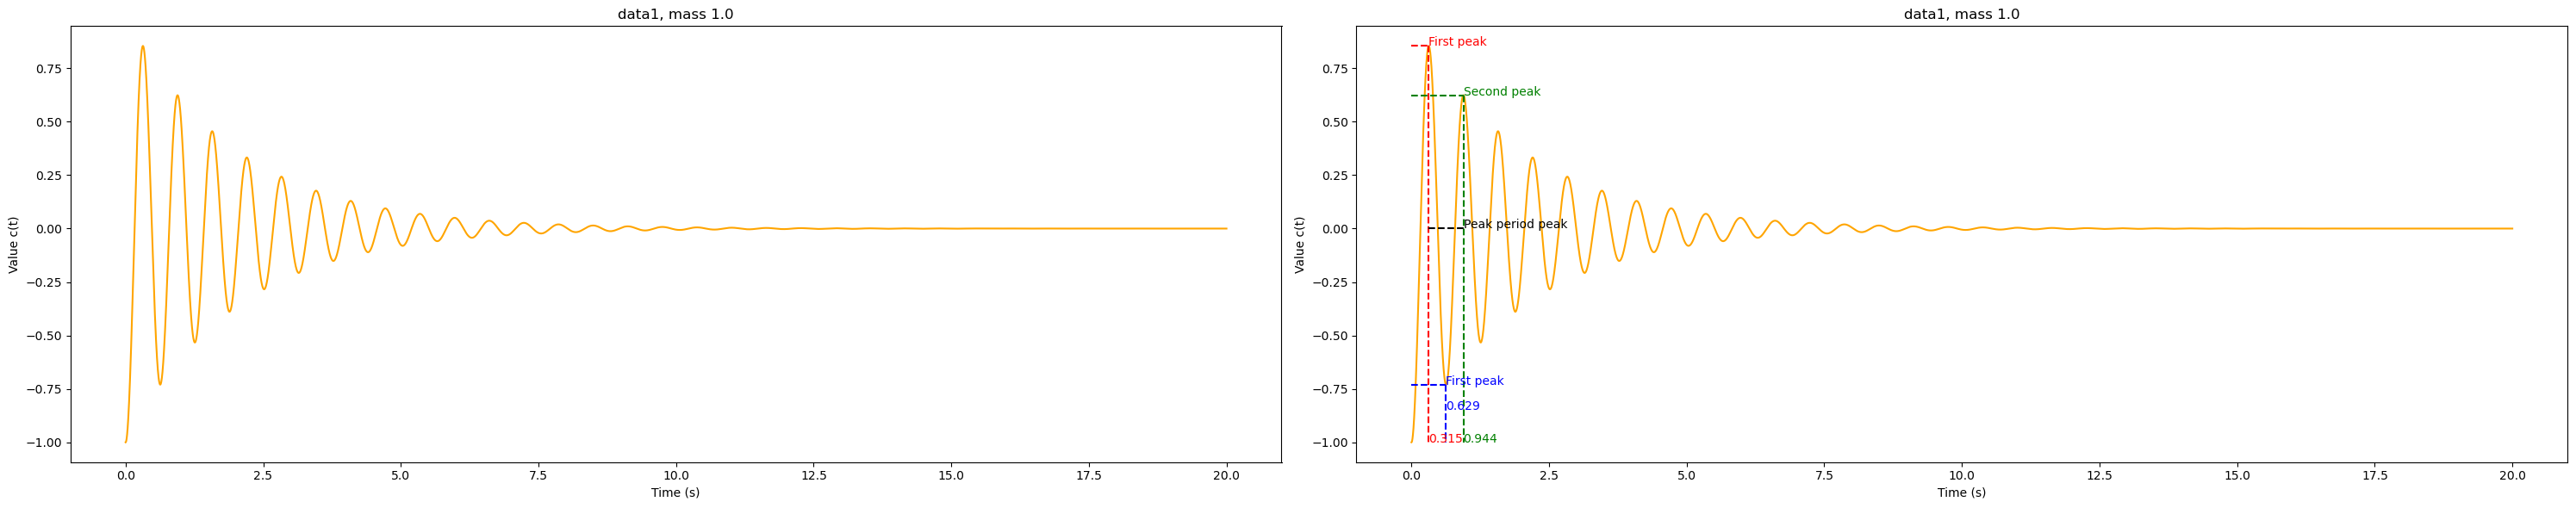

In [22]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(30, 6))

# Read, analyze, and then plot data 1
# plot_system(axs, 'Data/data1.csv')
dict_tmp, ts, vs, name = ts_vs_fname('Data/data1.csv', m=1.0)
plot_system(axs, dict=dict_tmp, ts=ts, vs=vs, name=name, m=1.0)
# Make it fit better
fig.tight_layout()
plt.show()

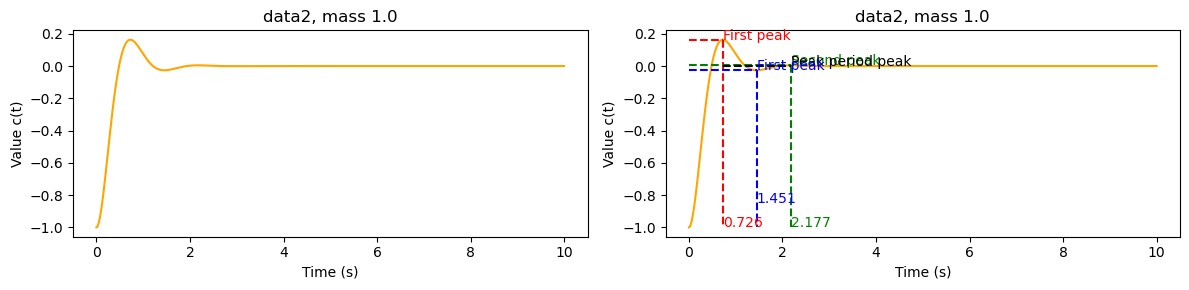

In [23]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 3))

# Read, analyze, and then plot data 2
dict_tmp, ts, vs, name = ts_vs_fname('Data/data2.csv', m=1.0)
plot_system(axs, dict=dict_tmp, ts=ts, vs=vs, name=name, m=1.0)
# Make it fit better
fig.tight_layout()
plt.show()

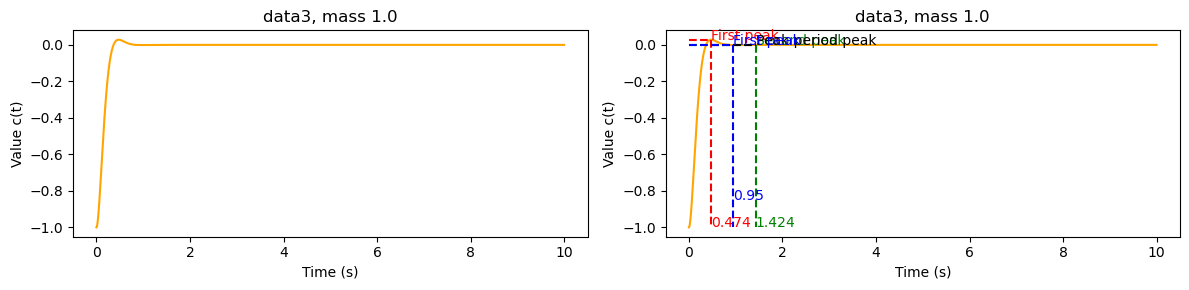

In [24]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 3))

# Read, analyze, and then plot data 3
dict_tmp, ts, vs, name = ts_vs_fname('Data/data3.csv', m=1.0)
plot_system(axs, dict=dict_tmp, ts=ts, vs=vs, name=name, m=1.0)
# Make it fit better
fig.tight_layout()
plt.show()

In [25]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

# Part 2 - ode simulation

In this part of the assignment you'll simulate the spring-mass system yourself. We'll follow the second half of Lab 5 - using ode to do the simulation (you just have to write the derivative function and the set-up code).

This should be nearly identical to the predator_prey_derivative ode example (from a coding syntax standpoint). The equations and the meanings of the variables will be different, however.

- Like the c_tutorial_iterative_systems example, you will need to calculate two values, but this time dx/dt and dx^2/dt^2 
- Like the predator_prey_derivative example, you will
-- create a derivative function that takes in a 2 dimensional current state (x, dx/dt), t (not used), and params (c, k, and m) and returns dx/dt and dx^2/d^2t
-- params will be a dictionary that you create in the calling code
-- create a set of time values to evaluate the system at
-- use ode to do the actual forward simulation

Functions you'll need

- a derivative function (like predator_prey_derivative)
- a function/cell to create the initial data to simulate and write out/save the results
- a function that calls your code from part 1 to analyze and plot the data (do NOT write new plotting/analysis code). Two options:
-- Write the data out to a file then read it back in using the code you just wrote in the previous part
-- If you split up your plot/analysis functions the right way, you can just pass the data directly to the plot/analysis functions

Parameters:

- c: damping term (system_damping in json file)
- k: spring term (system_spring in json file)
- m: mass (don't forget to put this value in the analysis dictionary)

Equation:

-  dx/dt = dx/dt
-  d^2x/d^2t = (-c * dx/dt - k * x) / m


In [26]:
# TODO: You'll need to import integrate
from scipy import integrate

In [27]:
# TODO: write a deriative function.
#  Note that the input state will have x and the derivative of x in it
#   You will return the derivative of x and the derivative of the derivative of x
#   Note that the derivative never changes - you only have to calculate the second derivative
# This is the function that you will pass to odeint 
# It should implememt the Equations for dx/dt and d^2x/d^2t given above
def derive(state, t, params):
    x, x_deriv = state
    c, k, m = params['c'], params['k'], params['m']
    x_second_deriv = (-c*x_deriv-k*x)/m
    return [x_deriv, x_second_deriv]

In [28]:
# TEST CELL
# Write a call to the derivative function to test it with known values

In [29]:
# TODO write a function that takes in the starting conditions (x and the derivative of x), along with the parameters
#  you need to calculate the derivative (zeta, k, and m)
# Call integrate.odeint with the function you created above, plus your parameters, 
#  and return the result of that function, along with the t values
#   You might also want pass in the step for the t and the total amount of time to integrate over as parameters
# 
# This function should setup the initial state, figure out which set of t value (ts) you want,
#   and pass the parameters in to integrate.odeint. 
# It should return the t values you created and the values (just the position, not the first derivative)
# In otherwords, ts and vs just like you read in from the dataX.csv files
#
# A note on the t values: these can be relatively sparse (60-100 per period); odeint will adjust its sampling rate in order to
#   make sure the values are close to correct at the t values you give it. If you give it lots of t values, it will take longer
#   to run (and to plot)

def find_ts_vs(x, x_deriv, params, t_step=0.1, t_max=10):
    init_state = [x, x_deriv]
    ts=np.arange(0, t_max, t_step)
    vs = integrate.odeint(derive, init_state, ts, args=(params,), atol=1e-9, rtol=1e-6)
    return ts, vs[:, 0]

In [30]:
# In this cell you'll take the ts and vs you just calculated with odeint and pass them to
#   your analyze_data function to get out the peaks/period

# Run the ode with the following parameters and store the answer in dict_answ
# Make sure you run the simulation long enough for it to stabilize
# x0 = -0.5, c = 1.1, m = 2.0, k = 50.0

ts, vs = find_ts_vs(x=-0.5, x_deriv=0, params={'c':1.1, 'm':2.0, 'k':50.0}, t_step=0.01, t_max=20)

dict_answ_ode1 = analyze_data_from_values(ts=ts, vs=vs, mass=2.0)

In [31]:
grader.check("ode_functions")

ode_functions results: All test cases passed!

<!-- BEGIN QUESTION -->

# Part b: Recreate data 1
Using your simulation code, re-create the plot for data 1

- Get the parameters from your initial analysis
- Pick a reasonable stop time
- Plot the result

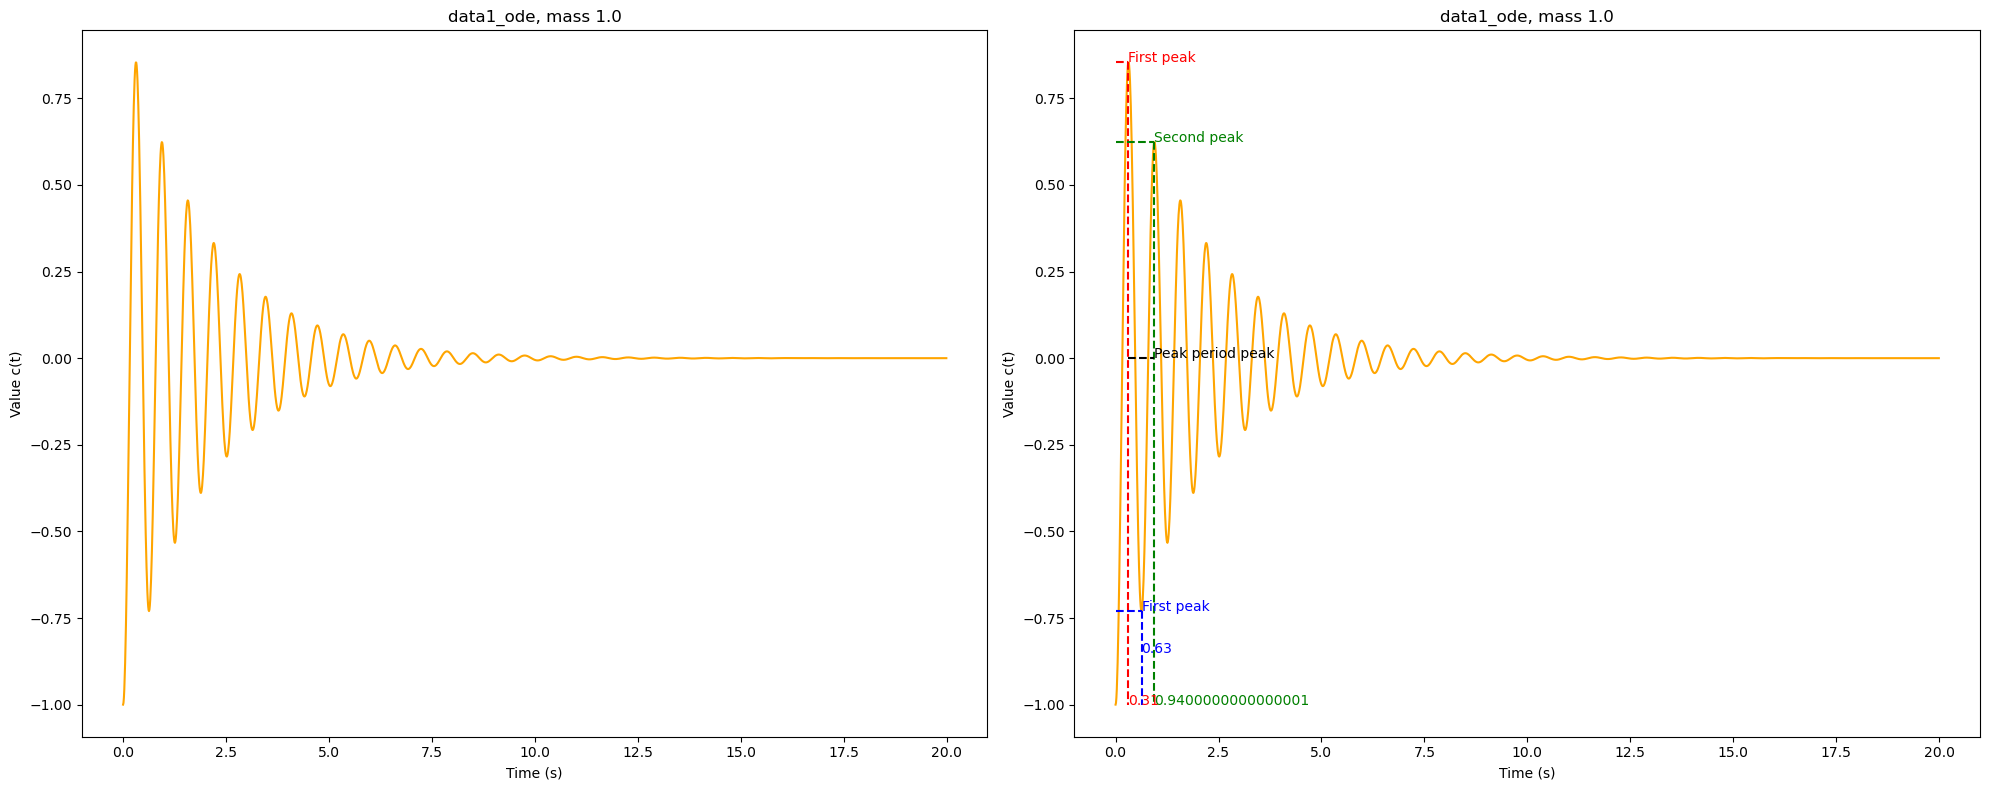

In [32]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 8))

# Run your simulation, analyze it, and plot the results
# Note: This SHOULD just be calling existing functions
# Paraneters you should use for the simulate are the starting conditions for data1
#    k is system_spring, c is system_damping
# x0 = -1.0, c = 1.0, m = 1.0, k = 100.0
# Simulate
#  - gets ts and vs
# Analayze
#  - gets dictionary from ts and vs
#  - use that data in your plot to plot the first/second peaks etc
# Plot
#  - plot the ts and vs with the peaks etc labeled (same as in part 1)

params = {'c':1.0, 'm':1.0, 'k':100.0}
ts, vs = find_ts_vs(x=-1.0, x_deriv=0, params=params, t_step=0.01, t_max=20)
recreate_data_1_dict = analyze_data_from_values(ts=ts, vs=vs, mass=params['m'])

plot_system(axs, dict=recreate_data_1_dict, ts=ts, vs=vs, name='data1_ode', m=params['m'])

# Make it fit better
fig.tight_layout()
plt.show()


In [33]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

# Part c - increasing mass

Increase the mass from 1 to 10 (but use the same c and k parameters from the previous problem).

Plot the system. Has it stabilized? Adjust the time to run so that it stabilizes. Then plot the result.

Set dict_bigger_analysis to be the analysis with mass 

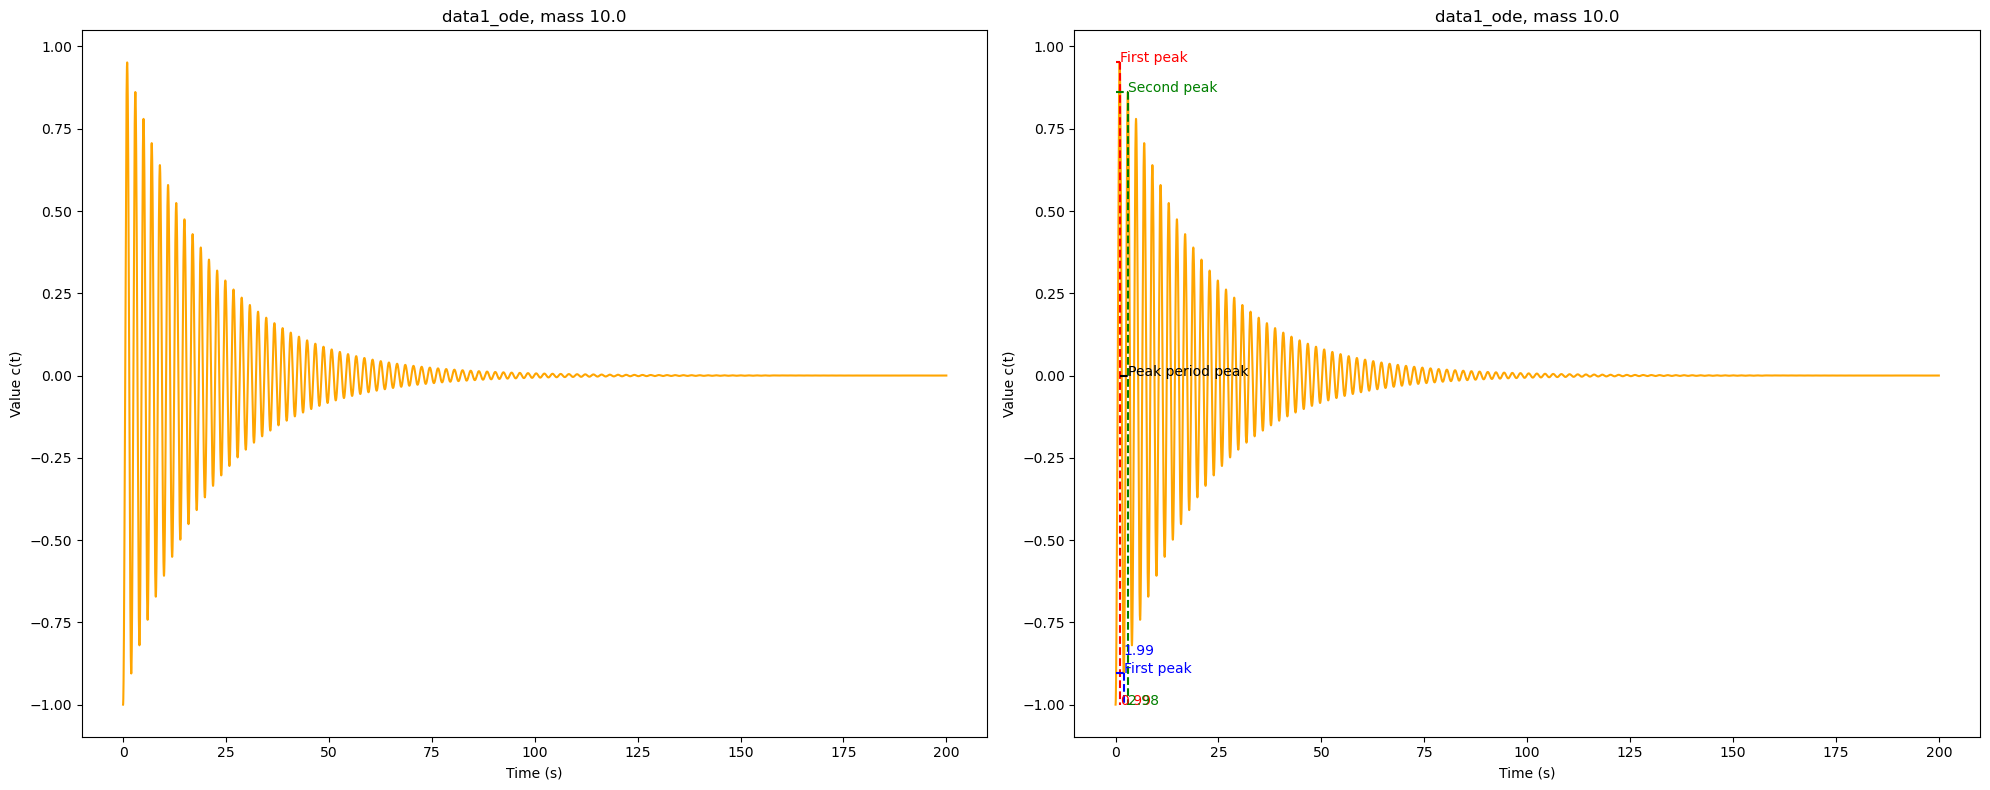

In [34]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 8))


# Run and plot the simulation with the mass increased to 10.
# Other parameters are the same as in the part b.
params_bigger = {'c':1.0, 'm':10.0, 'k':100.0}
ts, vs = find_ts_vs(x=-1.0, x_deriv=0, params=params_bigger, t_step=0.01, t_max=200)
dict_bigger_mass_analysis = analyze_data_from_values(ts=ts, vs=vs, mass=params_bigger['m'])

plot_system(axs, dict=dict_bigger_mass_analysis, ts=ts, vs=vs, name='data1_ode', m=params_bigger['m'])

# Make it fit better
fig.tight_layout()
plt.show()

In [35]:
# Check your analysis (set dict_bigger_mass_analysis)
assert(compare_dictionaries('Data/sim_and_plot_answer_c.json', dict_bigger_mass_analysis))

In [36]:
grader.check("bigger_mass")

bigger_mass results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [37]:

# List of names (creates a set)
worked_with_names = {"Luc Dale"}
# List of URLS I25 (creates a set)
websites = {"https://numpy.org, https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html"}
# Approximate number of hours, including lab/in-class time
hours = 6.5

In [38]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

- Make sure you have comments for your functions and in your code
- Do a restart then run all to make sure everything runs ok. DO THIS. 
- Take out print statements that result in pages of numbers
- Save the file
- Submit just this .ipynb file through gradescope, HW 2 system analysis
- You do NOT need to submit the data files - we will supply those
- Where there are given variable/file names (eg, foo = ...) DON'T change those, or the autograder will fail

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Most likely failure for this assignment is not naming the data directory and files correctly and/or reading and writing files to other directories.

A second gentle reminder that you should NOT be copying and pasting code (let alone sending files) to other people in the class. We do run all of the code through a plagiarism detector. Including previous terms.